# New Section

In [ ]:
import pandas as pd

In [ ]:
dataset = {
    'Y': [3011, 1305, 1879, 2654, 2849, 1068, 2892, 2543, 3074, 849, 2184, 2943, 1357, 2755, 2163, 3099, 1600, 353, 1778, 740, 2129, 3302, 2412, 2683, 2515, 2395, 2292, 1000, 600, 1864, 3027, 1978, 2791, 1982, 900, 1964, 1247, 3067, 700, 1500, 3110, 2644, 1378, 2601, 501, 1292, 2125, 1431, 2260, 1770],
    'X': [9714, 3728, 6062, 8845, 8378, 3338, 8507, 7947, 9915, 1632, 6825, 8918, 4100, 9184, 6180, 9997, 4500, 1069, 5925, 2466, 6083, 9712, 7780, 8383, 7185, 7483, 7640, 2100, 2000, 6012, 8902, 5345, 8210, 5662, 2700, 6546, 2900, 9894, 1500, 5000, 8885, 8813, 3446, 7881, 1164, 3401, 6641, 3329, 6648, 4800]
}
dataset = pd.DataFrame(dataset)
dataset.head()

,Y,X
0,3011,9714
1,1305,3728
2,1879,6062
3,2654,8845
4,2849,8378


In [ ]:
import statsmodels.api as sm

Y = dataset.Y
X = sm.add_constant(dataset.X)

Y.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0    3011
1    1305
2    1879
3    2654
4    2849
Name: Y, dtype: int64

In [ ]:
X.head()

,const,X
0,1.0,9714
1,1.0,3728
2,1.0,6062
3,1.0,8845
4,1.0,8378


In [ ]:
resultado_regressao = sm.OLS(Y, X, missing='drop').fit()

In [ ]:
beta_1 = resultado_regressao.params[0]
beta_2 = resultado_regressao.params[1]
resultado_regressao.params

const    207.903314
X          0.297291
dtype: float64

In [ ]:
resultado_regressao.conf_int(alpha=0.05)

,0,1
const,107.116864,308.689763
X,0.282092,0.312490


In [ ]:
dataset['Y_previsto_statsmodels'] = resultado_regressao.predict()
dataset.head()

,Y,X,Y_previsto_statsmodels
0,3011,9714,3095.785086
1,1305,3728,1316.203010
2,1879,6062,2010.079483
3,2654,8845,2837.439476
4,2849,8378,2698.604723


In [ ]:
resultado_regressao.predict([1, 7510])[0]

2440.556403140435

# Resíduos

In [ ]:
dataset['Residuos'] = resultado_regressao.resid
dataset.head()

,Y,X,Y_previsto_statsmodels,Residuos
0,3011,9714,3095.785086,-84.785086
1,1305,3728,1316.203010,-11.203010
2,1879,6062,2010.079483,-131.079483
3,2654,8845,2837.439476,-183.439476
4,2849,8378,2698.604723,150.395277


In [ ]:
dataset.Residuos.mean()

-5.525180313270539e-13

## Nova seção

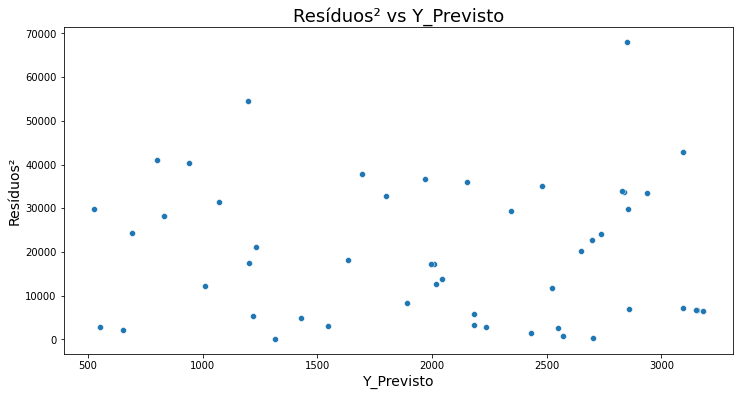

In [ ]:
import seaborn as sns
ax = sns.scatterplot(x=dataset.Y_previsto_statsmodels, y=dataset.Residuos**2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos² vs Y_Previsto', fontsize=18)
ax.set_xlabel('Y_Previsto', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
ax

## R2

In [ ]:
sqe = resultado_regressao.ssr #SQE


In [ ]:
sqr = resultado_regressao.ess #SQR

In [ ]:
# SQT = SQE + SQR
sqt = sqe + sqr

In [ ]:
r2 = resultado_regressao.rsquared

# Testes aplicados a um modelo de regressão

In [ ]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           3.56e-38
Time:                        20:10:51   Log-Likelihood:                -318.16
No. Observations:                  50   AIC:                             640.3
Df Residuals:                      48   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9033     50.127      4.148      0.0

In [ ]:
#EQM (Erro quadrático médio)
EQM = resultado_regressao.mse_resid
EQM

20520.54244831649

# Teste F

In [ ]:
resultado_regressao.fvalue

1546.7019608482472